# svm--乳腺癌分类检测



In [9]:
import pandas as pd

# 加载数据集，你需要把数据放到目录中
data = pd.read_csv("./breast_cancer.csv")
# 数据探索
# 因为数据集中列比较多，我们需要把dataframe中的列全部显示出来
pd.set_option('display.max_columns', None)
print(data.columns)
print(data.head(5))
print(data.describe())

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')
         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42

In [10]:
# 将特征字段分成三份
features_mean = list(data.columns[2:12])
features_se = list(data.columns[12:22])
features_worst = list(data.columns[22:32])

# 将id列删除
data.drop("id", axis=1, inplace=True)

# 将标签列转换为0和1
data["diagnosis"] = data["diagnosis"].map({"M": 1, "B": 0})

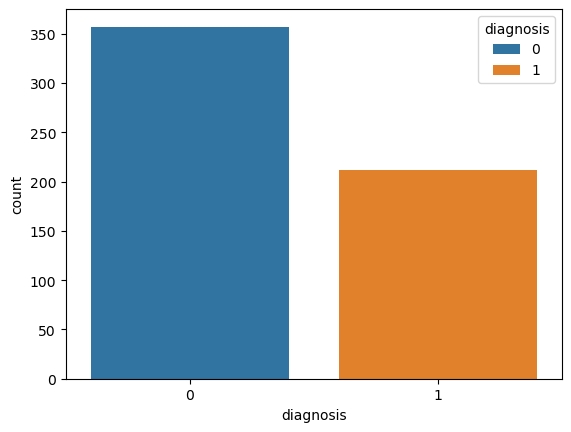

In [14]:
# 将肿瘤诊断结果可视化

import seaborn as sns 
import matplotlib.pyplot as plt

sns.countplot(data,x="diagnosis",hue="diagnosis")
plt.show()


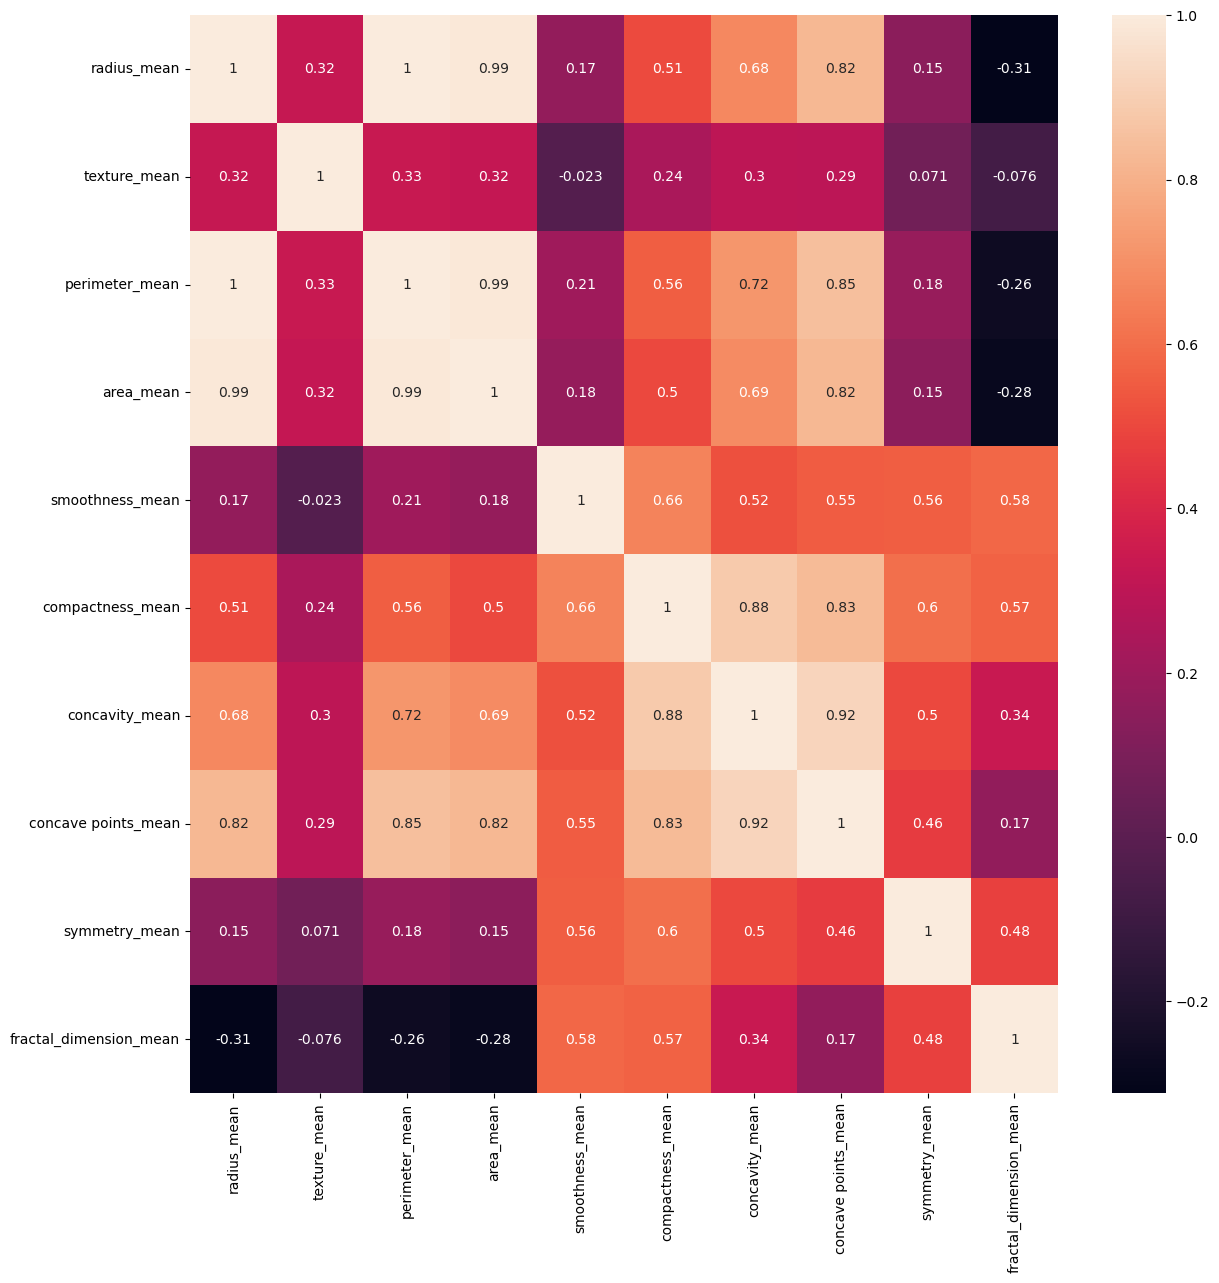

In [16]:
# 用热力图的形式呈现features_mean之间的相关性
corr = data[features_mean].corr()
plt.figure(figsize=(14,14))
# annot=True 表示在热力图上显示相关性系数
sns.heatmap(corr,annot=True)
# 颜色越浅，表示相关性越大
plt.show()


In [17]:
# 特征选择

# 特征选择的目的是降维，减少特征数量，提高模型性能，增强分类器的泛化能力，避免数据过拟合 

# 特征选择的方法：
# 1. 过滤法：根据特征的统计特性进行选择，比如相关系数、卡方检验、互信息等
# 2. 包装法：根据模型性能进行选择，比如递归特征消除、前向选择、后向选择等
# 3. 嵌入法：根据模型性能进行选择，比如L1正则化、L2正则化、决策树等

# 这里我们使用过滤法进行特征选择

# 我们能看到 mean、se 和 worst 这三组特征是对同一组内容的不同度量方式，我们可以保留 mean 这组特征，在特征选择中忽略掉 se 和 worst。
# 同时我们能看到 mean 这组特征中，radius_mean、perimeter_mean、area_mean 这三个属性相关性大，compactness_mean、daconcavity_mean、concave points_mean 这三个属性相关性大。
# 我们分别从这 2 类中选择 1 个属性作为代表，比如 radius_mean 和 compactness_mean

# 特征选择
features_remain = ['radius_mean','texture_mean', 'smoothness_mean','compactness_mean','symmetry_mean', 'fractal_dimension_mean'] 


In [18]:
# 划分训练集和测试集
from sklearn.model_selection import train_test_split

train,test = train_test_split(data,test_size=0.3)
train_X = train[features_remain]
train_y = train["diagnosis"]
test_X = test[features_remain]
test_y = test["diagnosis"]

In [19]:
# 采用Z-Score规范化数据，保证每个特征维度的数据均值为0，方差为1

# 当我们在做数据挖掘之前，不同的指标可能具有不同的量纲，如果我们不消除这些指标之间的取值范围差别，以及不同量纲所造成的影响的话，就会影响到后续数据分析（分类、聚类等）的结果。
# 因此我们需要进行规范化处理，也就是让数据按照一定的标准落入到一个特定的区间内，便于我们后续分析使用

from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
train_X = ss.fit_transform(train_X)
test_X = ss.transform(test_X)

In [20]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

svc = SVC()
svc.fit(train_X,train_y)
test_predict = svc.predict(test_X)

print("准确率: ",accuracy_score(test_y,test_predict))

准确率:  0.9298245614035088
